# Лабораторная 2
## Предварительная обработка данных
### Выполнил студент группы 16-В 1 Цыганов Никита

<b>Цель лабораторной работы</b> – получение навыков работы с библиотеками анализа данных, предварительной обработки данных, средствами визуализации.
<b>Задание:</b> 31 вариант - Wine:  
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации.
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.



<b>1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт):</b>

1. Класс(Class) - категория классов
2. Алкоголь(Alhocol) - процентное содержание алкоголя
3. Яблочная кислота(Malic acid) - процентное содержание яблочной кислоты.
4. Щёлочь(Ash) - щёлочь в вине
5. Содержание щёлочи(Alcanity of ash) - процентное содержание щёлочи в вине
6. Магний(Magnesium) - содержание магния
7. Общее число фенолов(Total phenols) - Общее число фенолов в вине
8. Флавоноиды(Flavanoids) - природные красители в вине
9. Нефлаваноидные фенолы(Nonflavanoid phenols) - искусственные красители в вине
10. Проантоцианин(Proanthocyanins) - экстракт виноградных косточек
11. Интенсивность цвета(Color intensity) - яркость цвета вина
12. Оттенок(Hue) - оттенок вина
13. Разбавленность вина(OD280/OD315 of diluted wines) - разбавленность вина водой
14. Сорт вина(Proline)


In [66]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (auc, roc_curve, precision_recall_curve, average_precision_score)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

columns_ru = ["Класс", "Алкоголь", "Яблочная кислота", "Щёлочь", "Содержание щёлочи", "Магний", "Общее число фенолов", 
              "Флавоноиды", "Нефлаваноидные фенолы", "Проантоцианин", "Интенсивность цвета", "Оттенок", 
              "Разбавленность вина", "Сорт вина"]
columns_en = ["Class", "Alhocol", "Malic acid", "Ash", "Alcanity of ash", "Magnesium", "Total phenols", "Flavanoids", 
              "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
file = pd.read_csv("wine.data.txt", names=columns_ru)
file


,Класс,Алкоголь,Яблочная кислота,Щёлочь,Содержание щёлочи,Магний,Общее число фенолов,Флавоноиды,Нефлаваноидные фенолы,Проантоцианин,Интенсивность цвета,Оттенок,Разбавленность вина,Сорт вина
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


<b>2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции:</b>

In [2]:
print("Число записей в таблице до удаления: {0}".format(file.shape[0]))
un_dup_file = file.copy()
un_dup_file.drop_duplicates()
print("Число записей в таблице после удаления: {0}".format(un_dup_file.shape[0]))

Число записей в таблице до удаления: 178
Число записей в таблице после удаления: 178


<b>3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая):</b>

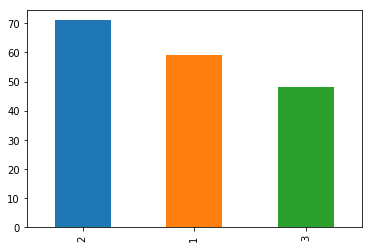

In [3]:
counts = un_dup_file["Класс"].value_counts()
counts.plot(kind="bar")

Из гистограммы видно, что данные несбалансированны - записей второго класса больше всех

<b>4.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию):</b>

Был выбран способ масштабирования через нормализацю количественных признаков. Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др. В этом случае количественные признаки полезно нормализовать.
Также признаки "Класс" и "Сорт вина" были исключены, так как не являются количественными.
Диаграмма признаков до масштабирования:

In [ ]:
data = un_dup_file[columns_ru[1:-1]]
data = (data - data.mean()) / data.std()
data.describe() # исключение NAN-записей из таблицы
data

Диаграмма до масштабирования

In [ ]:
un_dup_file.boxplot(column=[*columns_ru[1:4]])

In [ ]:
un_dup_file.boxplot(column=[*columns_ru[4:7]])

In [ ]:
un_dup_file.boxplot(column=[*columns_ru[7:9]])

In [ ]:
un_dup_file.boxplot(column=[*columns_ru[9:11]])

In [ ]:
un_dup_file.boxplot(column=[*columns_ru[11:13]])

Диаграмма после масштабирования

In [ ]:
data.boxplot(column=[*columns_ru[1:4]])

In [ ]:
data.boxplot(column=[*columns_ru[4:7]])

In [ ]:
data.boxplot(column=[*columns_ru[7:9]])

In [ ]:
data.boxplot(column=[*columns_ru[9:11]])

In [ ]:
data.boxplot(column=[*columns_ru[11:13]])

Как можно увидеть, после масштабируемости значения стали варьироваться от -1 до 1 с центром примерно в нуле.

<b>5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены:</b>

В этой таблице категориальные признаки - "Класс" и "Сорт вина". Первый уже в нужном ему виде - в виде кодировки (от 1 до 3). Когда не хотят заполонять признаковую матрицу кучей бинарных признаков, применяют кодировки, в которых категории кодируются какими-то интерпретируемыми значениями. Я выбрал среднее значение сорта вин в классе.

In [ ]:
un_dup_file["Класс_и_сорт"] = un_dup_file["Класс"].map(un_dup_file.groupby("Класс")["Сорт вина"].mean())
un_dup_file

<b>6.	Оцените корреляцию между признаками и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации):</b>

In [ ]:
Вычислим корреляцию Спирмена между каждым признаком

In [ ]:
un_dup_file[un_dup_file.columns[1:]].corr()["Алкоголь"][:-1]

In [ ]:
un_dup_file[un_dup_file.columns[1:]].corr()["Яблочная кислота"][:-1]

In [ ]:
un_dup_file[un_dup_file.columns[1:]].corr()["Щёлочь"][:-1]

In [ ]:
un_dup_file[un_dup_file.columns[1:]].corr()["Содержание щёлочи"][:-1]

In [ ]:
un_dup_file[un_dup_file.columns[1:]].corr()["Магний"][:-1]

In [ ]:
un_dup_file[un_dup_file.columns[1:]].corr()["Общее число фенолов"][:-1]

In [ ]:
un_dup_file[un_dup_file.columns[1:]].corr()["Флавоноиды"][:-1]

In [ ]:
un_dup_file[un_dup_file.columns[1:]].corr()["Нефлаваноидные фенолы"][:-1]

In [ ]:
un_dup_file[un_dup_file.columns[1:]].corr()["Проантоцианин"][:-1]

In [ ]:
un_dup_file[un_dup_file.columns[1:]].corr()["Интенсивность цвета"][:-1]

In [ ]:
un_dup_file[un_dup_file.columns[1:]].corr()["Оттенок"][:-1]

In [ ]:
un_dup_file[un_dup_file.columns[1:]].corr()["Разбавленность вина"][:-1]

In [ ]:
un_dup_file[un_dup_file.columns[1:]].corr()["Сорт вина"][:-2]

Ну или так:

In [ ]:
un_dup_file.corr()

Общее число фенолов, флавоноиды, разбавленность вина, оттенок и сорт вина коррелируют с наибольшим числом других признаков, чем остальные

In [ ]:
task = un_dup_file.copy()
del task["Общее число фенолов"]
del task["Флавоноиды"]
del task["Разбавленность вина"]
del task["Оттенок"]
del task["Сорт вина"]
task

<b>7.	Заполните пропущенные значения в данных:</b> 

Посмотрим, сколько записей содержат пустые значения:

In [8]:
print("Число записей в таблице до удаления: {0}".format(un_dup_file.shape[0]))
un_null_file = un_dup_file.copy()
un_null_file.replace(0.0, np.nan, inplace = True)
un_null_file.dropna(inplace = True)
print("Число записей в таблице после удаления: {0}".format(un_null_file.shape[0]))

Число записей в таблице до удаления: 178
Число записей в таблице после удаления: 178


In [ ]:
un_null_file.count(axis=0)

Вывод выше говорит о том, что пропущенных значений нету, соответственно задание пропускается.

<b>8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC:</b>

Поиск оптимальных значений параметров можно осуществить с помощью класса GridSearchCV – поиск наилучшего набора параметров, доставляющих минимум ошибке перекрестного контроля (cross-validation). По умолчанию рассматривается 3-кратный перекрестный контроль.
Для удобства отдельно рассмотрим столбцы, соответствующие входным признакам (это будет матрица X), а отдельно – выделенный признак (вектор y). Найдём оптимальный радиус для классификатора ближайших соседей: задаётся радиус для выбора ближайших объектов. Алгоритм ищет в обучающей выборке k наиболее близких объекта и относит новый объект к тому классу, которому принадлежит большинство из них.

In [131]:
from sklearn.model_selection import train_test_split
sort = un_null_file["Сорт вина"][0:1].tolist()
_class = un_null_file.copy()
X = _class.drop('Класс', axis=1)  # Выбрасываем столбец 'класс'.
Y = _class["Класс"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 178)
rnc = RadiusNeighborsClassifier(outlier_label=1)
grid = GridSearchCV(rnc, param_grid={'radius': np.arange(0, 5, 0.25)})
grid.fit(X_train, y_train)
best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.radius
print("Ошибка перекрёстного контроля:", best_cv_err)
print("Оптимальное значение:", best_n_neighbors)

c:\users\nekit\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Ошибка перекрёстного контроля: 0.6370967741935484
Оптимальное значение: 2.75


c:\users\nekit\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ошибка перекрестного контроля составила 63.7%. Это может быть обусленно тем, что для построения моделей в рамках схемы перекрестного контроля используются не все данные.

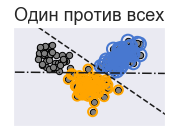

<Figure size 1440x1440 with 0 Axes>

In [132]:
import matplotlib.pyplot as _plt
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.cross_decomposition import CCA
from sklearn.datasets import make_multilabel_classification

def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    _plt.plot(xx, yy, linestyle, label=label)

Y = label_binarize(Y, classes=[1, 2, 3])
X = CCA(n_components=2).fit(X, Y).transform(X)
min_x = np.min(X[:, 0])
max_x = np.max(X[:, 0])

min_y = np.min(X[:, 1])
max_y = np.max(X[:, 1])
classif = OneVsRestClassifier(SVC(kernel='linear'))
classif.fit(X, Y)
_plt.subplot(2, 2, 1)
_plt.title("Один против всех")

zero_class = np.where(Y[:, 0])
one_class = np.where(Y[:, 1])
_plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
_plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
            facecolors='none', linewidths=2, label='Class 1')
_plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
            facecolors='none', linewidths=2, label='Class 2')

plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
            'Boundary\nfor class 1')
plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
            'Boundary\nfor class 2')
_plt.xticks(())
_plt.yticks(())

_plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
_plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)

_plt.figure(figsize=(20, 20))
_plt.show()

<b>Кривые PR и ROC:</b>

ROC график:

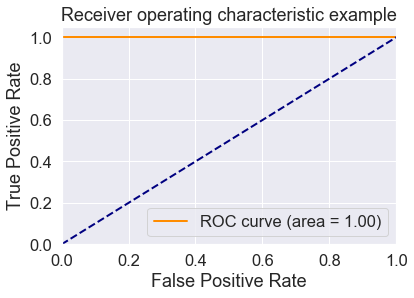

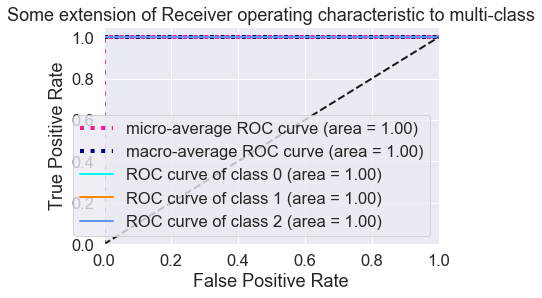

In [133]:
from scipy import interp
from itertools import cycle
n_classes = Y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=0)
y_score = classif.fit(X_train, y_train).decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

PR график:

Average precision score, micro-averaged over all classes: 1.00


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=1.00')

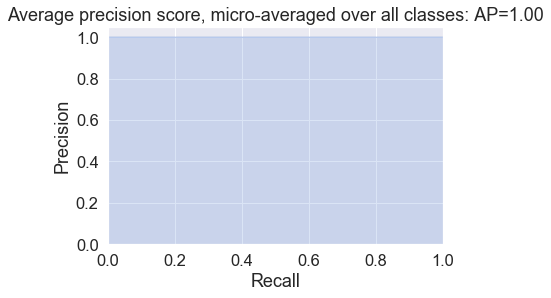

In [134]:
n_classes = Y.shape[1]
random_state = np.random.RandomState(0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=random_state)

# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier
# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=random_state))
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b',
                 **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

<b>9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы:</b>

При сравнении кривые получились с одинаковыми показателями качества.